# **Personal Identity**

Nama  : [Antonius Wisnumurti Sulistyanto](https://www.linkedin.com/in/antonius-wisnumurti-sulistyanto/)

Kelas : DS Batch 33 A

# Deskripsi Assignment
Divisi bisnis dari Tribe Growth meminta Anda untuk melakukan analisis terhadap transaksi harian yang terjadi di platform e-commerce. Anda juga diminta untuk melakukan forecasting guna membantu tim dalam menyusun strategi bisnis ke depan.

Student akan melakukan eksplorasi dan analisis data time series, membangun minimal dua model forecasting, serta mengevaluasi performa model menggunakan Mean Absolute Percentage Error (MAPE).

- Row ID - Nomor urut.
- Order ID - ID yang dibuat ketika pesanan produk ditempatkan.
- Order Date - Tanggal pelanggan menempatkan pesanannya.
- Ship Date - Tanggal pesanan dikirim.
- Ship Mode - Moda pengiriman setiap pesanan.
- Customer ID - ID pelanggan.
- Customer Name - Nama pelanggan.
- Segment - Segmen pelanggan.
- Country - Negara (fokus pada data toko AS).
- City - Kota tempat transaksi terjadi.
- State - Negara bagian tempat transaksi terjadi.
- Postal Code - Kode pos.
- Region - Wilayah tempat transaksi terjadi.
- Product ID - ID setiap produk.
- Category - Kategori produk.
- Sub-Category - Sub-kategori produk.
- Product Name - Nama produk.
- Sales - Harga jual produk.
- Quantity - Jumlah produk yang terjual.
- Discount - Diskon pada setiap produk.
- Profit - Keuntungan yang diperoleh dari penjualan.

# Questions
1. Hitunglah total revenue, jumlah order, dan jumlah barang yang terjual sepanjang tahun 2019. Selain itu, hitung rata-rata jumlah barang yang dibeli per transaksi dan rata-rata spending per transaksi.
2. Hitunglah jumlah order dan GMV yang diperoleh dengan rentang waktu berikut:
- Harian
- Mingguan
- Bulanan
3. Catatan: GMV dihitung berdasarkan total spending yang dilakukan customer dengan memperhitungkan semua biaya dan diskon yang dibayarkan customer.
4. Tim marketing ingin mengetahui produk apa saja yang paling sering dibeli dalam 1 tahun terakhir. Rencananya, mereka akan mencoba mem-bundling top produk ini untuk meningkatkan penjualan. Identifikasi top 10 produk yang membawa revenue terbesar dalam 3 bulan terakhir dan produk apa saja yang bisa di-bundling berdasarkan hasil analisis.
5. Identifikasi top 5 kota yang memiliki order terbanyak dan 5 kota yang memiliki total dan rata-rata spending terbesar.
6. Tim marketing ingin mengetahui kapan penjualan mencapai titik tertinggi sehingga mereka bisa merancang strategi marketing. Analisis pada rentang jam berapa penjualan terjadi secara aktif (rush hour).
7. Buatlah model forecasting menggunakan model yang sudah diajarkan pada materi untuk memprediksi jumlah visitor dan jumlah transaksi untuk 1 bulan ke depan dengan data harian. Anda diharuskan setidaknya membuat 2 model untuk selanjutnya diambil model terbaik berdasarkan MAPE terkecil. Berikan rekomendasi apa yang perlu dilakukan tim bisnis berdasarkan hasil forecasting dan analisis Anda.

In [247]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)

# Read Data

## 1. Read data set from csv file

In [248]:
#load data
data_1 = pd.read_csv('/content/sales_data_january_2019.csv')
data_2 = pd.read_csv('/content/sales_data_february_2019.csv')
data_3 = pd.read_csv('/content/sales_data_march_2019.csv')
data_4 = pd.read_csv('/content/sales_data_april_2019.csv')
data_5 = pd.read_csv('/content/sales_data_may_2019.csv')
data_6 = pd.read_csv('/content/sales_data_june_2019.csv')
data_7 = pd.read_csv('/content/sales_data_july_2019.csv')
data_8 = pd.read_csv('/content/sales_data_august_2019.csv')
data_9 = pd.read_csv('/content/sales_data_september_2019.csv')
data_10 = pd.read_csv('/content/sales_data_october_2019.csv')
data_11 = pd.read_csv('/content/sales_data_november_2019.csv')
data_12 = pd.read_csv('/content/sales_data_december_2019.csv')

In [249]:
data_1.sample(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1707,142857,iPhone,1,700,01/31/19 10:39,"251 Washington St, Los Angeles, CA 90001"
6817,147717,Wired Headphones,1,11.99,01/17/19 12:11,"626 Walnut St, Atlanta, GA 30301"


In [250]:
#concat all data
data_full = pd.concat([data_1,
                      data_2,
                      data_3,
                      data_4,
                      data_5,
                      data_6,
                      data_7,
                      data_8,
                      data_9,
                      data_10,
                      data_11,
                      data_12], ignore_index=True)
data_full.sample(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
99393,236095,AA Batteries (4-pack),1,3.84,07/26/19 11:41,"775 Hickory St, Los Angeles, CA 90001"
42512,181844,27in 4K Gaming Monitor,1,389.99,04/05/19 09:10,"861 Pine St, Atlanta, GA 30301"
73008,210879,USB-C Charging Cable,1,11.95,06/06/19 16:38,"600 Lake St, San Francisco, CA 94016"


## 2. Check data types for every columns

In [251]:
#info data
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


- Total Column are 5 with rows 186305
- All columns have correct data type, except Quantity Ordered, Price Each, and Order Dat

## 3. Check duplicated value in every column

In [252]:
#check duplicate values
print('Duplicate values is ', data_full.duplicated().sum())

Duplicate values is  1162


In [253]:
#shows all duplicate values
data_full[data_full.duplicated(keep = False)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
874,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
875,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
...,...,...,...,...,...,...
185481,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185729,NaN,NaN,NaN,NaN,NaN,NaN
185925,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185955,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


- There are 1428 rows that contain same Order ID, because Order ID is a unique values that represent different between one transaction with others, and all row have same values either

## 4. Check miss value in every columns

In [254]:
#check miss value
miss_value = data_full.isnull().sum().reset_index().rename(columns = {'index':'column', 0:'miss_value'})
miss_value

,column,miss_value
0,Order ID,545
1,Product,545
2,Quantity Ordered,545
3,Price Each,545
4,Order Date,545
5,Purchase Address,545


- There are few of missing values in every columns but only 545
- If I have 180K+ rows, percentage of miss valeus in every columns are around less than 1%
- But I will check percentage from every columns later at Data Cleaning section

## 5. Check values doesn't match with column name

In [255]:
#check values doesn't match with column
list_column = data_full.columns
for x in list_column:
  print(f'-------------------------------{x}-------------------------------')
  jumlah_value = data_full[x].value_counts().sort_index().reset_index()
  display(jumlah_value)

-------------------------------Order ID-------------------------------


,Order ID,count
0,141234,1
1,141235,1
2,141236,1
3,141237,1
4,141238,1
...,...,...
178433,319667,1
178434,319668,1
178435,319669,1
178436,319670,1


-------------------------------Product-------------------------------


,Product,count
0,20in Monitor,4101
1,27in 4K Gaming Monitor,6230
2,27in FHD Monitor,7507
3,34in Ultrawide Monitor,6181
4,AA Batteries (4-pack),20577
5,AAA Batteries (4-pack),20641
6,Apple Airpods Headphones,15549
7,Bose SoundSport Headphones,13325
8,Flatscreen TV,4800
9,Google Phone,5525


-------------------------------Quantity Ordered-------------------------------


,Quantity Ordered,count
0,1,168552
1,2,13324
2,3,2920
3,4,806
4,5,236
5,6,80
6,7,24
7,8,5
8,9,3
9,Quantity Ordered,355


-------------------------------Price Each-------------------------------


,Price Each,count
0,109.99,4101
1,11.95,21903
2,11.99,18882
3,14.95,21658
4,149.99,7507
5,150,15450
6,150.0,99
7,1700,4702
8,1700.0,22
9,2.99,20641


-------------------------------Order Date-------------------------------


,Order Date,count
0,01/01/19 03:07,1
1,01/01/19 03:40,1
2,01/01/19 04:56,1
3,01/01/19 05:53,1
4,01/01/19 06:03,1
...,...,...
142391,12/31/19 23:42,2
142392,12/31/19 23:45,1
142393,12/31/19 23:52,1
142394,12/31/19 23:53,1


-------------------------------Purchase Address-------------------------------


,Purchase Address,count
0,"1 11th St, Atlanta, GA 30301",1
1,"1 11th St, Los Angeles, CA 90001",1
2,"1 11th St, San Francisco, CA 94016",1
3,"1 12th St, Los Angeles, CA 90001",1
4,"1 12th St, New York City, NY 10001",1
...,...,...
140783,"999 Wilson St, Los Angeles, CA 90001",1
140784,"999 Wilson St, New York City, NY 10001",1
140785,"999 Wilson St, Portland, OR 97035",1
140786,"999 Wilson St, San Francisco, CA 94016",1


There are few columns that have match values:
- Purchase Addres

- Order Date

- Quantity Ordered

- Order ID

- City that have most huge transaction is Chicago
- This retail company have a lot Male buyers
- November 22, 2023 is day when transaction at peak
- Income class Middle is greater than Low, or High

# Data Cleaning

## 1. Alter Data type

In [256]:
#check data type
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


- We will alter data type for columns Quantity Ordered, Price Each, and Order Date

In [257]:
#alter data type column
data_full['Price Each'] = pd.to_numeric(data_full['Price Each'], errors = 'coerce')
data_full['Quantity Ordered'] = pd.to_numeric(data_full['Quantity Ordered'], errors = 'coerce')
data_full['Order Date'] = pd.to_datetime(data_full['Order Date'], errors = 'coerce')
data_full.info()

/tmp/ipython-input-3227837127.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_full['Order Date'] = pd.to_datetime(data_full['Order Date'], errors = 'coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          186305 non-null  object        
 1   Product           186305 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  186305 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 8.6+ MB


- Data type of Date have been altered to datetime, and numeric

## 2. Duplicate Handling

In [258]:
#drop duplicate values
print('Duplicate Values is ', data_full.duplicated().sum())

duplicate_values = data_full[data_full.duplicated(keep = False)].sort_values('Order ID')
duplicate_values

Duplicate Values is  1162


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
874,142071,AA Batteries (4-pack),1.0,3.84,2019-01-17 23:02:00,"131 2nd St, Boston, MA 02215"
875,142071,AA Batteries (4-pack),1.0,3.84,2019-01-17 23:02:00,"131 2nd St, Boston, MA 02215"
4125,145143,Lightning Charging Cable,1.0,14.95,2019-01-06 03:01:00,"182 Jefferson St, San Francisco, CA 94016"
4126,145143,Lightning Charging Cable,1.0,14.95,2019-01-06 03:01:00,"182 Jefferson St, San Francisco, CA 94016"
5811,146765,Google Phone,1.0,600.00,2019-01-21 11:23:00,"918 Highland St, New York City, NY 10001"
...,...,...,...,...,...,...
184678,NaN,NaN,NaN,NaN,NaT,NaN
184695,NaN,NaN,NaN,NaN,NaT,NaN
185042,NaN,NaN,NaN,NaN,NaT,NaN
185729,NaN,NaN,NaN,NaN,NaT,NaN


- There are 1428 duplicated values in data full, and have same values in every columns
- That all values should be drop

In [259]:
#drop dupilicated values
data_full =  data_full.drop_duplicates()
print('Duplicate Values now is ', data_full.duplicated().sum())

Duplicate Values now is  0


- Now duplicated values are already dropped

## 3. Handle Missing Values

In [260]:
#shows percentage of missing values in every columns
total_rows = len(data_full)

for column in data_full.columns:
    missing_count = data_full[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column: '{column}', miss values: {missing_count}, total percentage: ({missing_percentage:.2f}%)")

Column: 'Order ID', miss values: 1, total percentage: (0.00%)
Column: 'Product', miss values: 1, total percentage: (0.00%)
Column: 'Quantity Ordered', miss values: 2, total percentage: (0.00%)
Column: 'Price Each', miss values: 2, total percentage: (0.00%)
Column: 'Order Date', miss values: 2, total percentage: (0.00%)
Column: 'Purchase Address', miss values: 1, total percentage: (0.00%)


In [261]:
#show all missing values for every columns
list_columns_num = data_full.columns.tolist()

for x in list_columns_num:
  print(f'===================== {x} =====================')
  missing_count = data_full[x].isna().sum()
  missing_percentage = (missing_count / total_rows) * 100
  print(f"Column: '{x}', miss values: {missing_count}, total percentage: ({missing_percentage:.2f}%)")
  coll_miss = data_full[data_full[x].isna()]
  display(coll_miss)

===================== Order ID =====================
Column: 'Order ID', miss values: 1, total percentage: (0.00%)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaT,NaN


===================== Product =====================
Column: 'Product', miss values: 1, total percentage: (0.00%)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaT,NaN


===================== Quantity Ordered =====================
Column: 'Quantity Ordered', miss values: 2, total percentage: (0.00%)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaT,NaN
1073,Order ID,Product,NaN,NaN,NaT,Purchase Address


===================== Price Each =====================
Column: 'Price Each', miss values: 2, total percentage: (0.00%)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaT,NaN
1073,Order ID,Product,NaN,NaN,NaT,Purchase Address


===================== Order Date =====================
Column: 'Order Date', miss values: 2, total percentage: (0.00%)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaT,NaN
1073,Order ID,Product,NaN,NaN,NaT,Purchase Address


===================== Purchase Address =====================
Column: 'Purchase Address', miss values: 1, total percentage: (0.00%)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaT,NaN


In [262]:
#drop missing values from each columns
data_full = data_full.dropna()
data_full.isna().sum().reset_index().rename(columns = {'index':'Column Name', 0:'Total Miss Values'})

,Column Name,Total Miss Values
0,Order ID,0
1,Product,0
2,Quantity Ordered,0
3,Price Each,0
4,Order Date,0
5,Purchase Address,0


- All missing values are already gone

## 4. Handle Value doesn't match

In [263]:
#recheck values doesn't match with column
list_column = data_full.columns
for x in list_column:
  print(f'--------------- {x} ---------------')
  jumlah_value = data_full[x].value_counts().sort_index().reset_index()
  display(jumlah_value)

--------------- Order ID ---------------


,Order ID,count
0,141234,1
1,141235,1
2,141236,1
3,141237,1
4,141238,1
...,...,...
178432,319666,1
178433,319667,1
178434,319668,1
178435,319669,1


--------------- Product ---------------


,Product,count
0,20in Monitor,4098
1,27in 4K Gaming Monitor,6225
2,27in FHD Monitor,7498
3,34in Ultrawide Monitor,6174
4,AA Batteries (4-pack),20558
5,AAA Batteries (4-pack),20612
6,Apple Airpods Headphones,15525
7,Bose SoundSport Headphones,13298
8,Flatscreen TV,4794
9,Google Phone,5522


--------------- Quantity Ordered ---------------


,Quantity Ordered,count
0,1.0,168291
1,2.0,13321
2,3.0,2920
3,4.0,806
4,5.0,236
5,6.0,80
6,7.0,24
7,8.0,5
8,9.0,3


--------------- Price Each ---------------


,Price Each,count
0,2.99,20612
1,3.84,20558
2,11.95,21859
3,11.99,18849
4,14.95,21610
5,99.99,13298
6,109.99,4098
7,149.99,7498
8,150.00,15525
9,300.00,4794


--------------- Order Date ---------------


,Order Date,count
0,2019-01-01 03:07:00,1
1,2019-01-01 03:40:00,1
2,2019-01-01 04:56:00,1
3,2019-01-01 05:53:00,1
4,2019-01-01 06:03:00,1
...,...,...
142390,2020-01-01 04:06:00,1
142391,2020-01-01 04:13:00,1
142392,2020-01-01 04:21:00,1
142393,2020-01-01 04:54:00,1


--------------- Purchase Address ---------------


,Purchase Address,count
0,"1 11th St, Atlanta, GA 30301",1
1,"1 11th St, Los Angeles, CA 90001",1
2,"1 11th St, San Francisco, CA 94016",1
3,"1 12th St, Los Angeles, CA 90001",1
4,"1 12th St, New York City, NY 10001",1
...,...,...
140782,"999 Wilson St, Atlanta, GA 30301",1
140783,"999 Wilson St, Los Angeles, CA 90001",1
140784,"999 Wilson St, New York City, NY 10001",1
140785,"999 Wilson St, Portland, OR 97035",1


Before there are few columns that have match values:
- Purchase Addres

- Order Date

- Quantity Ordered

- Order ID

But after I rechecked values that doesn't match with columns already gone, maybe becuse its already dropped during handling duplicate values

# Manipulation Data

##Descriptive Statistic

In [264]:
#descriptive statistic for numerical type
descriptive_numerical = data_full.describe()
descriptive_numerical

,Quantity Ordered,Price Each,Order Date
count,185686.000000,185686.000000,185686
mean,1.124544,184.519255,2019-07-18 21:32:06.298051328
min,1.000000,2.990000,2019-01-01 03:07:00
25%,1.000000,11.950000,2019-04-16 20:55:15
50%,1.000000,14.950000,2019-07-17 20:11:00
75%,1.000000,150.000000,2019-10-26 08:00:00
max,9.000000,1700.000000,2020-01-01 05:13:00
std,0.443069,332.843838,NaN


- Based on decriptive tabel We can see average of quantity customers ordered arround 1. Data distribution is normal because median and mean not quite far

In [265]:
#descriptive statistic for categorical type
descriptive_categorical = data_full.describe(include='object').T
descriptive_categorical

,count,unique,top,freq
Order ID,185686,178437,160873,5
Product,185686,19,USB-C Charging Cable,21859
Purchase Address,185686,140787,"193 Forest St, San Francisco, CA 94016",9


- From descriptive table We can see the most sold product is USB-C Charging Cable

##Create Revenue

In [266]:
data_full['Revenue'] = data_full['Quantity Ordered'] * data_full['Price Each']
data_full.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Revenue
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98


# Question 1

##Total order, quantity, and revenue by year

In [267]:
#total order, quantity, and revenue by year
total_revenue = data_full.groupby(data_full['Order Date'].dt.year).agg({'Order ID':'count', 'Quantity Ordered':'sum', 'Revenue':'sum'}).reset_index()
total_revenue.columns = ['Year', 'Total Order ID', 'Total Quantity', 'Revenue']
total_revenue

,Year,Total Order ID,Total Quantity,Revenue
0,2019,185652,208771.0,34456867.65
1,2020,34,41.0,8670.29


##Average quantity per transactions

In [268]:
#average quantity per transaction
total_quantity = data_full[data_full['Order Date'].dt.year == 2019]['Quantity Ordered'].sum()
total_transactions = data_full[data_full['Order Date'].dt.year == 2019]['Order ID'].count()
avg_quantity_trc = total_quantity / total_transactions
print('Average of quantity product for every transcation is ',avg_quantity_trc)

Average of quantity product for every transcation is  1.1245286880830803


##Average spending per transaction

In [269]:
#average spending per transaction
total_revenue = data_full[data_full['Order Date'].dt.year == 2019]['Revenue'].sum()
total_transactions = data_full[data_full['Order Date'].dt.year == 2019]['Order ID'].count()
avg_spend_trsc = total_revenue / total_transactions
print('Average spending of customers per transaction is ',avg_spend_trsc)

Average spending of customers per transaction is  185.5992267791351


#Question 2

##Daily

In [270]:
#daily total order, and revenue
daily = data_full.groupby(data_full['Order Date'].dt.date).agg({'Quantity Ordered':'sum', 'Revenue':'sum'}).reset_index()
daily.columns = ['Date', 'Total Quantity', 'GMV']
daily.head(3)

,Date,Total Quantity,GMV
0,2019-01-01,343.0,65681.94
1,2019-01-02,367.0,70663.20
2,2019-01-03,330.0,47046.20


##Weekly

In [271]:
#weekly total order, and revenue
weekly = data_full.groupby(data_full['Order Date'].dt.isocalendar().week).agg({'Quantity Ordered':'sum', 'Revenue':'sum'}).reset_index()
weekly.columns = ['Week', 'Total Quantity', 'GMV']
weekly.head(3)

,Week,Total Quantity,GMV
0,1,3892.0,636646.16
1,2,2454.0,409389.43
2,3,2460.0,394921.11


##Monthly

In [272]:
#monthly total order, and revenue
monthly = data_full.groupby(data_full['Order Date'].dt.month).agg({'Quantity Ordered':'sum', 'Revenue':'sum'}).reset_index()
monthly.columns = ['Month', 'Total Quantity', 'GMV']
monthly.head(3)

,Month,Total Quantity,GMV
0,1,10893.0,1821413.16
1,2,13431.0,2200078.08
2,3,16979.0,2804973.35


#Question 4

In [273]:
#last date of transaction
latest_date = data_full['Order Date'].max()

#3 months filter
three_months_ago = latest_date - pd.DateOffset(months=3)
recent_data = data_full[data_full['Order Date'] >= three_months_ago]

In [274]:
#top 10 product in 3 latest months
top_10_revenue = (
    recent_data
    .groupby('Product')['Revenue']
    .sum()
    .reset_index()
    .sort_values('Revenue', ascending=False)
    .head(10)
)

top_10_revenue

,Product,Revenue
13,Macbook Pro Laptop,2735300.00
18,iPhone,1601600.00
14,ThinkPad Laptop,1371986.28
9,Google Phone,1082400.00
1,27in 4K Gaming Monitor,841988.41
6,Apple Airpods Headphones,788250.00
3,34in Ultrawide Monitor,786579.30
8,Flatscreen TV,494100.00
7,Bose SoundSport Headphones,452954.70
2,27in FHD Monitor,370775.28


Based on top 10 products that have most contributed to revenue, We can see there 3 items that have same brand:
- Macbook Pro Laptop

- iPhone

- Apple Airpods Headphones

We can make bundling for all of them or just 2 of them



#Question 5

In [275]:
#extract city from addres
data_full['City'] = data_full['Purchase Address'].str.extract(r',\s*([^,]+)')
data_full.sample(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Revenue,City
31011,170843,AAA Batteries (4-pack),1.0,2.99,2019-03-25 13:46:00,"426 Lake St, New York City, NY 10001",2.99,New York City
186030,318878,Lightning Charging Cable,1.0,14.95,2019-12-10 12:48:00,"782 Washington St, San Francisco, CA 94016",14.95,San Francisco
159236,293289,AA Batteries (4-pack),1.0,3.84,2019-11-19 20:59:00,"795 Maple St, San Francisco, CA 94016",3.84,San Francisco


In [276]:
#top 5 average revenue by city
city_spend = data_full.groupby('City')['Revenue'].mean().reset_index()
city_spend.columns = ['City', 'Avg Revenue']
city_spend = city_spend.sort_values('Avg Revenue', ascending = False)
city_spend.head(5)

,City,Avg Revenue
0,Atlanta,187.996977
5,New York City,187.622938
3,Dallas,186.887474
8,Seattle,186.572828
6,Portland,186.306686


According to table aboce We can see Atlanta became city with highest average revenue, and then following by New York City, Dallas, Seatle, Portland

#Question 6

In [277]:
#make total revenue by time
revenue_time = data_full.groupby(data_full['Order Date'].dt.hour)['Revenue'].sum().reset_index()
revenue_time.columns = ['Time', 'Total Revenue']
revenue_time = revenue_time.sort_values('Total Revenue', ascending = False)
revenue_time.head(5)

,Time,Total Revenue
19,19,2411971.14
12,12,2314359.85
11,11,2296619.84
20,20,2280784.36
18,18,2218374.01


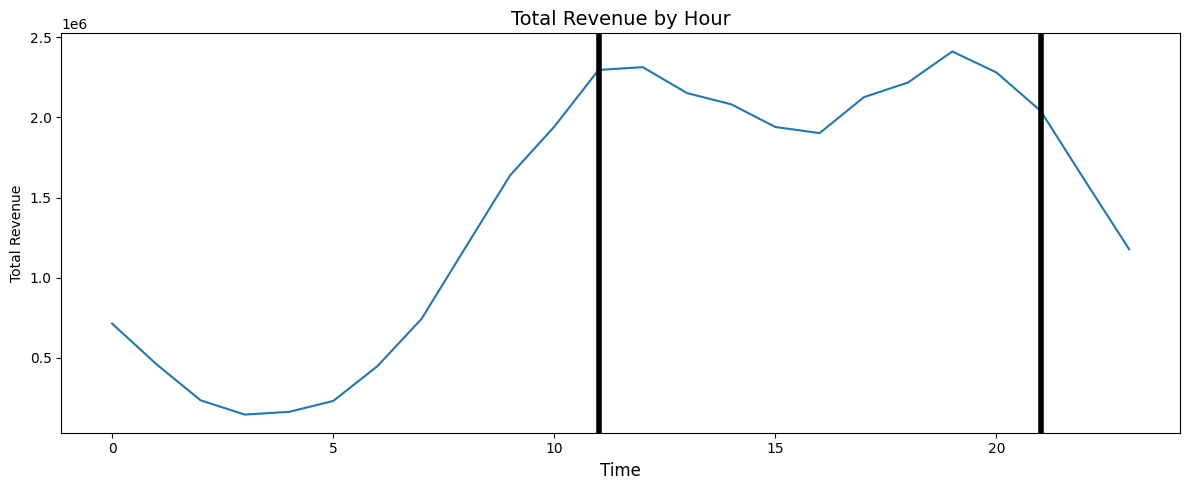

In [278]:
#chart total revenue by time
plt.figure(figsize=(12, 5))

sns.lineplot(x='Time', y='Total Revenue',
data=revenue_time)

plt.axvline(x=11, color='black', linewidth=4)
plt.axvline(x=21, color='black', linewidth=4)

plt.title('Total Revenue by Hour', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

As We can see here there range time between black line where alot customers make transactions and end up increased our revenue
- Range: 10am - 21pm. Between this where alot customers have been off or rest from activities

- Day Rush Hour: 11am - 12pm. Maybe alo customer use their rest time to shopping

- Night Rush Hour: 19pm - 21pm. Maybe alot peoples doing shopping after work done

#Question 7

In [279]:
#make daily visitor
daily_visitor = data_full.groupby(data_full['Order Date'].dt.date)['Order ID'].count().reset_index()
daily_visitor.columns = ['Date', 'Total Visitor']
daily_visitor['Date'] = pd.to_datetime(daily_visitor['Date'])

daily_visitor.head(3)

,Date,Total Visitor
0,2019-01-01,302
1,2019-01-02,323
2,2019-01-03,296


In [280]:
#set Date column as index
ts = daily_visitor.set_index('Date')['Total Visitor']
ts.head(3)

,Total Visitor
Date,
2019-01-01,302
2019-01-02,323
2019-01-03,296


## ADF Test

In [281]:
#ADV Test, if p-value < 0.05 = stationer
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(ts)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -2.729792126882427
p-value: 0.06902328229162313


- p-value is 0.069 greater than 0.05 so We can draw conclude that stationery happens in data time series

## Make Data Time Series become Stationer

In [282]:
#use log to make data stationer
ts_log = np.log(ts)
ts_log_diff = ts_log.diff().dropna()

In [283]:
#recheck use ADF test to data
adf_result_diff = adfuller(ts_log_diff)
print(f'ADF Statistic after diff: {adf_result_diff[0]}')
print(f'p-value after diff: {adf_result_diff[1]}')

ADF Statistic after diff: -11.910260445536073
p-value after diff: 5.317179857130114e-22



- p-value is 0.00...5 which is less than 0.05

- Our data time series already stationer after We use differencing

## Split Dataset

In [284]:
#split the data
train = ts[:'2019-08-31']
test = ts['2019-09-01':]

Ww have been splited data became two sections:
- Train: 1 January 2019 - 31 August 2019

- Test: 1 September 2019 - 1 January 2020

##ARIMA

In [285]:
# Buat model ARIMA untuk data time series
# Di sini kita gunakan log(train) agar model lebih stabil terhadap variasi besar (log transform)
# Parameter (1,1,1) artinya: p=1 (Auto REGRESSION), d=1 (differencing), q=1 (MOVING AVERAGE)
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(np.log(train), order=(1,1,1))
result_arima = model_arima.fit()

forecast_arima_log = result_arima.forecast(steps=len(test))

forecast_arima = np.exp(forecast_arima_log)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


##Exponentional Smotthing

In [286]:
# Buat model ETS (Exponential Smoothing) dengan komponen tren dan musiman
# 'trend="add"' artinya kita mengasumsikan adanya tren naik/turun yang bersifat aditif
# 'seasonal="add"' artinya ada pola musiman (berulang) yang juga ditambahkan
# 'seasonal_periods=7' menunjukkan adanya pola mingguan (7 hari)
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_ets = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7)
result_ets = model_ets.fit()

forecast_ets = result_ets.forecast(steps=len(test))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


##MAPE

In [287]:
# Hitung MAPE (Mean Absolute Percentage Error) untuk mengukur akurasi kedua model
# Semakin kecil nilai MAPE, semakin akurat prediksi model terhadap data aktual
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

mape_arima = mean_absolute_percentage_error(test, forecast_arima)
mape_ets = mean_absolute_percentage_error(test, forecast_ets)

print(f'MAPE ARIMA: {mape_arima:.2%}')
print(f'MAPE ETS: {mape_ets:.2%}')

MAPE ARIMA: 40.24%
MAPE ETS: 44.23%


Score MAPE that We get from train for both model are arround > 40% which means it's not good to use for forecasting, We should tunning it to make it better

In [288]:
# Bandingkan nilai MAPE dari ARIMA dan ETS
# Pilih model dengan MAPE terkecil sebagai model terbaik

best_model = "ARIMA" if mape_arima < mape_ets else "ETS"

# Tampilkan model terbaik berdasarkan evaluasi MAPE
print(f"Model terbaik berdasarkan MAPE adalah: {best_model}")

Model terbaik berdasarkan MAPE adalah: ARIMA


We will use ARIMA because it have MAPE scrore less than Explonential Smotthing

##Forecast

In [289]:
# Forecast ulang selama 30 hari (1 bulan ke depan) menggunakan model terbaik yang sudah ditentukan
steps_ahead = 30

if best_model == "ARIMA":
    tuned_arima_model = ARIMA(np.log(train), order=(1,1,1)).fit()

    forecast_log = tuned_arima_model.forecast(steps=steps_ahead)

    forecast = np.exp(forecast_log)

else:
    tuned_ets_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7).fit()

    forecast = tuned_ets_model.forecast(steps=steps_ahead)

forecast.index = pd.date_range(start='2020-01-02', periods=steps_ahead, freq='D')

#evaluation
test_30 = test[:steps_ahead]

mape = mean_absolute_percentage_error(test_30, forecast)
mae = mean_absolute_error(test_30, forecast)
rmse = np.sqrt(mean_squared_error(test_30, forecast))

print(f"MAPE: {mape:.2%}")
print(f"MAE : {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAPE: 3.65%
MAE : 13.83
RMSE: 16.89


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


We can see from MAPE score is decresed from 40% to less than 5%, which is absolutely good

In [290]:
#make a data frame
forecast_january_df = forecast.to_frame().reset_index()

forecast_january_df.columns = ['Date', 'Forecasted Visitor']

forecast_january_df.head()

,Date,Forecasted Visitor
0,2020-01-02,392.307440
1,2020-01-03,394.293049
2,2020-01-04,394.140404
3,2020-01-05,394.152109
4,2020-01-06,394.151211


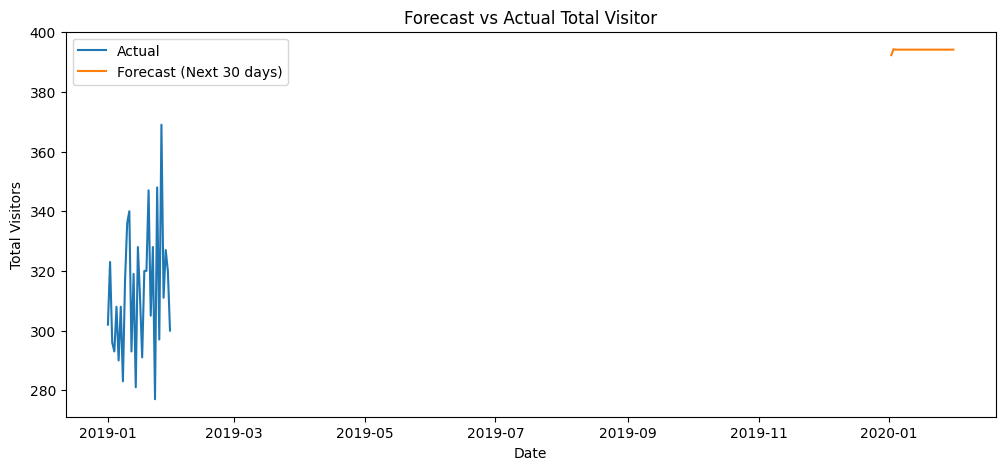

In [292]:
#chart forecast, and actual visitor
plt.figure(figsize=(12, 5))
plt.plot(ts[:30], label='Actual')  # Last 3 months of real data
plt.plot(forecast, label='Forecast (Next 30 days)')
plt.title('Forecast vs Actual Total Visitor')
plt.xlabel('Date')
plt.ylabel('Total Visitors')
plt.legend()
plt.show()


From chart forecast and actual visitors We can draw conclusion like this:

Based on that chart prediction for customers will visit our store next 30 days arround less than 400 peoples, same as fisrt month in 2019

So for bussines team can apply some solution like make:
- Early year promotion
- New year campaign
- Discount for 100 first customers
- Targeted ads or SMS/email marketing to increase store traffic

With that solution We can boosting our trafiic of customers and utlimately increasing our sales